<a href="https://colab.research.google.com/github/ankynator/notes-code-taic/blob/master/nube-palabras-semantica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wikipedia
!python -m spacy download es_core_news_sm
!python -m spacy download es_core_news_md

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import wikipedia
import random

#spacy
import spacy
import es_core_news_sm
import es_core_news_md
nlp = es_core_news_sm.load()

In [27]:
wikipedia.set_lang("es")
value=input("Ingrese palabra: ")
try:
    m=wikipedia.search(value,3)
    p=wikipedia.summary(m[0],sentences=3)
    print(p)
except wikipedia.exceptions.DisambiguationError as e:
    s=random.choice(e.options)
    p=wikipedia.summary(s,sentences=2)
    #print(p)

Ingrese palabra: pedro castillo
José Pedro Castillo Terrones (Tacabamba, 19 de octubre de 1969) es un profesor, rondero, dirigente sindical y político peruano.
Nacido y criado en Chota, Castillo fue rondero durante su juventud e incluso llegó a ser dirigente nacional de la Organización de rondas campesinas. Como docente de primaria y presidente del Comité de Lucha de las bases regionales del SUTEP, Castillo se hizo conocido a nivel nacional por ser el principal dirigente en la huelga magisterial de 2017.


In [28]:
doc = nlp(p)
#for token in doc: print(token.text, "|", token.lemma_, '|', token.pos_)

In [ ]:
for token in doc:
  print(token.text,'->', token.pos_)

In [30]:
from spacy.matcher import Matcher
matcher_full_name = Matcher(nlp.vocab)
matcher_noun_propn = Matcher(nlp.vocab)
matcher_noun_adj = Matcher(nlp.vocab)
matcher_verb = Matcher(nlp.vocab)

def full_name(nlp_doc):
     pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
     matcher_full_name.add('FULL_NAME', None, pattern)
     matches = matcher_full_name(nlp_doc)
     return matches


def noun_propn(nlp_doc):
     pattern = [{'POS': 'NOUN'}, {'POS': 'PROPN'}]
     matcher_noun_propn.add('NOUN_PROPN', None, pattern)
     matches = matcher_noun_propn(nlp_doc)
     return matches


def noun_adj(nlp_doc):
     pattern = [{'POS': 'NOUN'}, {'POS': 'ADJ'}]
     matcher_noun_adj.add('NOUN_ADJ', None, pattern)
     matches = matcher_noun_adj(nlp_doc)
     return matches


def verb(nlp_doc):
     pattern = [{'POS': 'VERB'}]
     matcher_verb.add('VERB', None, pattern)
     matches = matcher_verb(nlp_doc)
     return matches

In [31]:
con_significado = {}

matches_fn = full_name(doc)
matches_np = noun_propn(doc)
matches_na = noun_adj(doc)
matches_ve = verb(doc)

for match_id, start, end in matches_fn:
  span = doc[start: end]
  con_significado[span.text] = 1

for match_id, start, end in matches_np:
  span = doc[start: end]
  con_significado[span.text] = 2

for match_id, start, end in matches_na:
  span = doc[start: end]
  con_significado[span.text] = 1

for match_id, start, end in matches_ve:
  span = doc[start: end]
  con_significado[span.text] = 1

con_significado

{'Castillo Terrones': 1,
 'José Pedro': 1,
 'Pedro Castillo': 1,
 'bases regionales': 1,
 'conocido': 1,
 'dirigente nacional': 1,
 'dirigente sindical': 1,
 'hizo': 1,
 'huelga magisterial': 1,
 'nivel nacional': 1,
 'político peruano': 1,
 'rondas campesinas': 1}

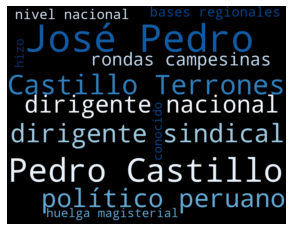

José Pedro Castillo Terrones (Tacabamba, 19 de octubre de 1969) es un profesor, rondero, dirigente sindical y político peruano.
Nacido y criado en Chota, Castillo fue rondero durante su juventud e incluso llegó a ser dirigente nacional de la Organización de rondas campesinas. Como docente de primaria y presidente del Comité de Lucha de las bases regionales del SUTEP, Castillo se hizo conocido a nivel nacional por ser el principal dirigente en la huelga magisterial de 2017.


In [32]:
#generamos la nube
wc = WordCloud(width=1024, height=800, colormap='Blues', min_font_size=18)

wc.generate_from_frequencies(con_significado)

#mostramos la nube
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

print(p)